In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error

In [3]:
root_path = 'result_data'
result_file_path_list = os.listdir(root_path)

In [4]:
file_idx = 6
gt_data = pd.read_csv(os.path.join(root_path, result_file_path_list[file_idx*2]))
pred_data = pd.read_csv(os.path.join(root_path, result_file_path_list[(file_idx*2)+1]))

In [5]:
left_load_idx_list = [1, 3, 5, 7, 9]
right_load_idx_list = [11, 13, 15, 17, 19]

0.20156391563902454
0.1875695017118993
0.17467754739181215
0.20169843106685728
0.45709286137106736


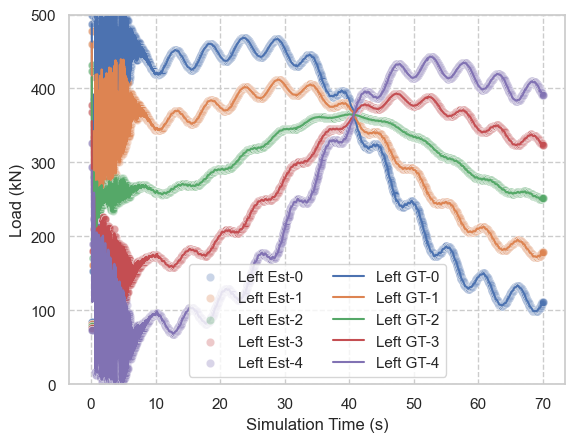

In [6]:
sns.set_theme(font_scale=1.0)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

pred_data_list = []
gt_data_list = []

for i, idx in enumerate(left_load_idx_list):
    sns.scatterplot(x=pred_data.iloc[:, 0], y=pred_data.iloc[:, idx], label=f'Left Est-{i}', alpha=0.3)
    pred_data_list.append(pred_data.iloc[:, idx])

for i, idx in enumerate(left_load_idx_list):
    sns.lineplot(x=gt_data.iloc[:, 0], y=gt_data.iloc[:, idx], label=f'Left GT-{i}', linewidth=1.5)
    gt_data_list.append(gt_data.iloc[:, idx])

plt.xlabel('Simulation Time (s)')

plt.ylim(0, 500)
plt.ylabel('Load (kN)')

plt.legend(ncol=2)

for pred, gt in zip(pred_data_list, gt_data_list):
    print(mean_absolute_percentage_error(gt, pred)*100)

0.22967570824655356
0.20910979017151554
0.2020258512644498
0.25960612016060686
0.5977643244399253


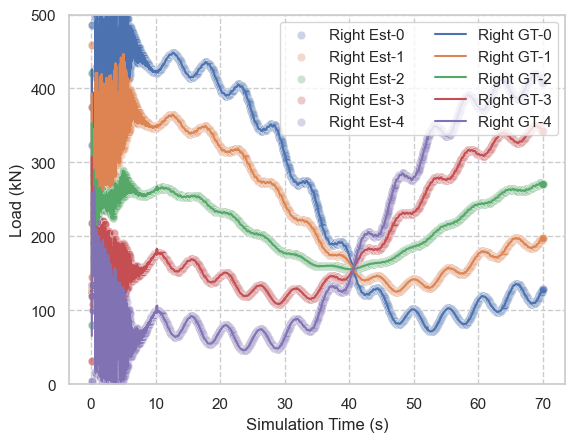

In [7]:
sns.set_theme(font_scale=1.0)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

pred_data_list = []
gt_data_list = []

for i, idx in enumerate(right_load_idx_list):
    sns.scatterplot(x=pred_data.iloc[:, 0], y=pred_data.iloc[:, idx], label=f'Right Est-{i}', alpha=0.3)
    pred_data_list.append(pred_data.iloc[:, idx])

for i, idx in enumerate(right_load_idx_list):
    sns.lineplot(x=gt_data.iloc[:, 0], y=gt_data.iloc[:, idx], label=f'Right GT-{i}', linewidth=1.5)
    gt_data_list.append(gt_data.iloc[:, idx])

plt.xlabel('Simulation Time (s)')

plt.ylim(0, 500)
plt.ylabel('Load (kN)')

plt.legend(ncol=2)

for pred, gt in zip(pred_data_list, gt_data_list):
    print(mean_absolute_percentage_error(gt, pred)*100)

Text(0, 0.5, 'Relative Errror(%)')

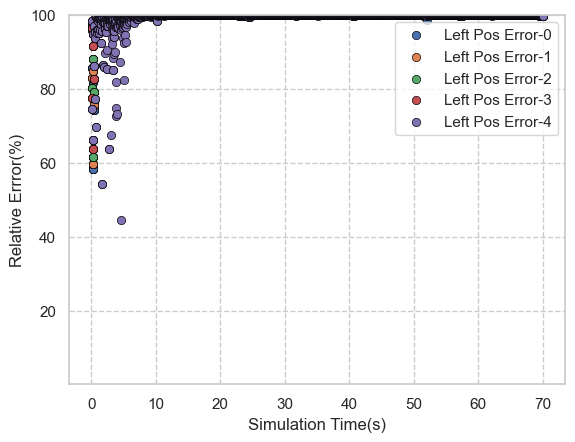

In [11]:
sns.set_theme(font_scale=1.0)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

for i, idx in enumerate(left_load_idx_list):
    mape = (np.abs(gt_data.iloc[:, idx]-pred_data.iloc[:, idx])/gt_data.iloc[:, idx]) * 100
    
    sns.scatterplot(x=gt_data.iloc[:, 0], y=mape, edgecolor='black', label=f'Left Pos Error-{i}')

plt.xlabel('Simulation Time(s)')

plt.yscale('log')
plt.ylim(0.1, 1000)
plt.ylabel('Relative Errror(%)')

Text(0, 0.5, 'Relative Errror(%)')

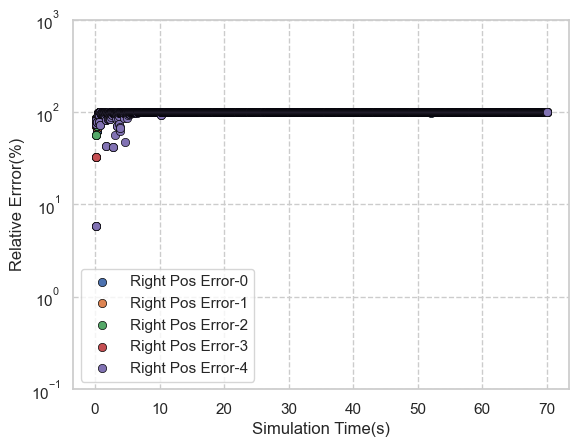

In [9]:
sns.set_theme(font_scale=1.0)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

for i, idx in enumerate(right_load_idx_list):
    mape = (np.abs(gt_data.iloc[:, idx]-pred_data.iloc[:, idx])/gt_data.iloc[:, idx]) * 100
    
    sns.scatterplot(x=gt_data.iloc[:, 0], y=mape, edgecolor='black', label=f'Right Pos Error-{i}')

plt.xlabel('Simulation Time(s)')

plt.yscale('log')
plt.ylim(0.1, 1000)
plt.ylabel('Relative Errror(%)')